# INDEX

- [1. 분류 알고리즘 선택](#1분류-알고리즘-선택)
- [2. 사이킷런 - 퍼센트론 훈련](#2사이킷런---퍼셉트론-훈련)
    - [2.1.붓꽃 데이터를 활용한 연습](#21붓꽃-데이터를-활용한-연습)
    - [2.2.데이터셋 분할](#22데이터셋-분할)
    - [2.3.특성 스케일 조정](#23특성-스케일-조정)
    - [2.4.사이킷런 퍼셉트론 학습](#24사이킷런-퍼셉트론-학습)
    - [2.5.결과 시각화](#25결과-시각화)
- [3.로지스틱 회귀를 사용한 클래스 확률 모델링](#3로지스틱-회귀를-사용한-클래스-확률-모델링)
    - [3.1.로지스틱 회귀의 이해와 조건부 확률](#31로지스틱-회귀의-이해와-조건부-확률)
    - [3.2.시그모이드 함수 그리기](#32시그모이드-함수-그리기)
    - [3.3.로그 가능도 함수 시각화](#33-로그-가능도-함수-시각화)
    - [3.4.아달린 구현을 로지스틱 회귀 알고리즘으로 변경](#34-아달린-구현을-로지스틱-회귀-알고리즘으로-변경)
    - [3.5.사이킷런을 사용한 로지스틱 회귀모델 훈련](#35사이킷런을-사용한-로지스틱-회귀모델-훈려)
    - [3.6.규제를 사용하여 과대적합 피하기](#36규제를-사용하여-과대적합-피하기)
    - [3.7.사이킷런 로지스틱 회귀에서의 규제](#37사이킷런-로지스틱-회귀에서의-규제)
- [4.SVM을 활용한 최대 마진 분류](#4svm을-활용한-최대-마진-분류)
    - [4.1.최대 마진](#41-최대-마진)
    - [4.2.슬랙 변수를 사용하여 비선형 분류 문제 다루기](#42슬랙-변수를-사용하여-비선형-분류-문제-다루기)
    - [4.3.사이킷런의 다른 구현](#43사이킷런의-다른-구현)
- [5.커널 SVM을 사용하여 비선형 문제 해결](#5커널-svm을-사용하여-비선형-문제-해결)
    - [5.1.선형적으로 구분되지 않는 데이터를 위한 커널 방법](#51선형적으로-구분되지-않는-데이터를-위한-커널-방법)
    - [5.2.커널 기법을 사용하여 고차원 공간에서 분할 초평면](#52-커널-기법을-사용하여-고차원-공간에서-분할-초평면)
- [6.결정 트리 학습](#6결정-트리-학습)
    - [6.1.정보 이득 최대화 자원을 최대로 활용](#61정보-이득-최대화-자원을-최대로-활용)
    - [6.2.결정 트리 만들기](#62결정-트리-만들기)
    - [6.3.랜덤 포레스트로 여러 결정트리 연결](#63랜덤-포레스트로-여러-결정트리-연결)
- [7.k-최근접 이웃: 게으른 학습 알고리즘](#7k-최근접-이웃-게으른-학습-알고리즘)

# 1.분류 알고리즘 선택

머신러닝 알고리즘 훈련을 위한 단계

    1. 특성을 선택하고 훈련 샘플 수집
    2. 성능 지표 선택
    3. 분류 모델과 최적화 알고리즘 선택
    4. 모델의 성능 평가
    5. 알고리즘 튜닝

# 2.사이킷런 - 퍼셉트론 훈련

- 사용하기 쉬운 인터페이스로 분류 알고리즘을 최적화하여 구현한 사이킷런 API
- 사이킷런에 포함된 여러 기능
    - 많은 학습 알고리즘 제공
    - 데이터 전처리나 세부조정
    - 모델 평가를 위해 편리하게 사용할 수 있는 함수

## 2.1.붓꽃 데이터를 활용한 연습

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class Label : ', np.unique(y))

Class Label :  [0 1 2]


## 2.2.데이터셋 분할

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

- `test_size` : 테스트 데이터 셋은 30%를 사용
- `random_state` : 난수 생성기의 랜덤 시드
- `stratify` : 계층화 기능 사용 (`train_test_split()` 함수가 훈련 데이터셋과 테스트 데이터 셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만든다는 의미)

In [3]:
print('Count Label "y" : ', np.bincount(y))
print('Count Label "y_train" : ', np.bincount(y_train))
print('Count Label "y_test" : ', np.bincount(y_test))

Count Label "y" :  [50 50 50]
Count Label "y_train" :  [35 35 35]
Count Label "y_test" :  [15 15 15]


## 2.3.특성 스케일 조정

In [4]:
from sklearn.preprocessing import StandardScaler as SC

sc = SC()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 2.4.사이킷런 퍼셉트론 학습

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

- `eta0` : 학습률 eta
- `max_iter` : 에포크 횟수
- `random_state` : 에포크마다 훈련데이터셋을 섞은 결과가 재현되기 위함

In [6]:
y_pred = ppn.predict(X_test_std)
print('오분류 갯수 : %d' % (y_test!=y_pred).sum())

오분류 갯수 : 1


In [7]:
from sklearn.metrics import accuracy_score

print(f'정확도 : {accuracy_score(y_test, y_pred)}')

정확도 : 0.9777777777777777


## 2.5.결과 시각화

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
    # 테스트 샘플 부각하여 그리기
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolors='black', alpha=1, linewidth=1, marker='o', s=100, label='test set')

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


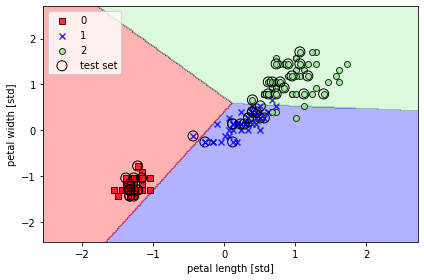

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- 예측 데이터 정보를 보면 잘 예측하지 못하는 모습을 보임
- 퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터 셋에는 수렴하지 못함
- 실전에서 보통 퍼셉트론 알고리즘을 추천하지 않는 이유이기도 함

# 3.로지스틱 회귀를 사용한 클래스 확률 모델링

## 3.1.로지스틱 회귀의 이해와 조건부 확률

- `오즈비` : $\frac{P}{(1-P)}$
- $P$는 양성 샘플일 확률 (예측하려는 대상)
- 오즈비에 로그함수를 취한 것이 로짓 함수
    $$
    \begin{align*}
    logit(P) &= \log\frac{P}{(1-P)}
    \end{align*}
    $$
- 로짓 함수는는 0과 1사이의 입력값을 받아 실수 범위 값으로 변환
- 특성 가중치 합과 로그 오즈 사이의 선형 관계는 다음과 같음
    $$
    \begin{align*}
    logit(P(y=1|\mathbf{x})) &= w_0x_0+w_1x_1+\cdots+w_mx_m = \sum_{i=0}^{m}w_ix_i = \mathbf{w}^T\mathbf{x}
    \end{align*}
    $$
- $p(y=1|\mathbf{x}$는 특성 $\mathbf{x}$가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률임
- 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것이 관심 대상이므로 logit함수를 뒤집음
- 뒤집은 함수는 `로지스틱 시그모이드 함수` 라고 함.
    $$
    \begin{align*}
    \phi(z) = \frac{1}{1+e^{-x}}
    \end{align*}
    $$
- 여기서 $z$는 가중치와 입력의 선형 조합으로 이루어진 최종 입력 ($z=\mathbf{w}^T\mathbf{x}$)

## 3.2.시그모이드 함수 그리기

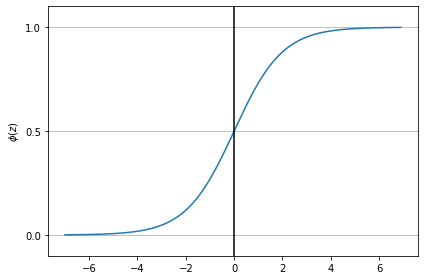

In [10]:
from matplotlib import pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.ylabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## 3.3. 로그 가능도 함수 시각화

In [11]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

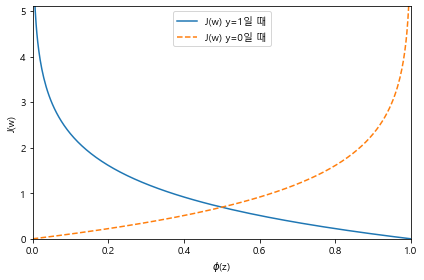

In [12]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) y=1일 때')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, label='J(w) y=0일 때', linestyle='--')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 3.4. 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [13]:
class LogisticRegressionGD(object):
    ''' 경사하강법을 사용한 로지스틱 회귀 분류기
    
    매개변수
    ----------------------
    eta : float
        학습률
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ----------------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합
        
    '''
    def __init__(self, eta=.01, n_iter=50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''훈련 데이터 학습
        
        매개변수
        ---------------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타겟값
            
        반환값
        ---------------------
        self : object
        
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y-output

            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            ## 제곱 오차합 대신 로지스틱 비용을 계산
            cost = (-y.dot(np.log(output)))-((1-y).dot(np.log(1-output)))
            
            self.cost_.append(cost)
        return self
            
    def net_input(self, X):
        '''최종 입력 계산'''
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, z):
        '''활성함수 (로지스틱)'''
        return 1./(1.+np.exp(-np.clip(z,-250, 250)))
    
    def predict(self, X):
        '''단위 계단 함수를 사용하여 클래스 레이블을 반환'''
        return np.where(self.activation(self.net_input(X))>=0.5, 1, 0)

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


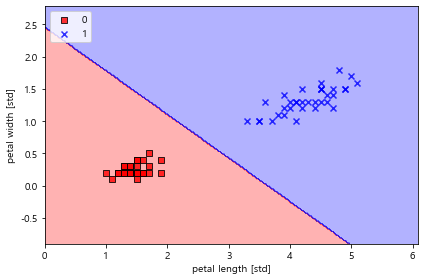

In [14]:
X_train_01_subset = X_train[(y_train==0) | (y_train==1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]
lrgd = LogisticRegressionGD(eta = .05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.5.사이킷런을 사용한 로지스틱 회귀모델 훈려

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


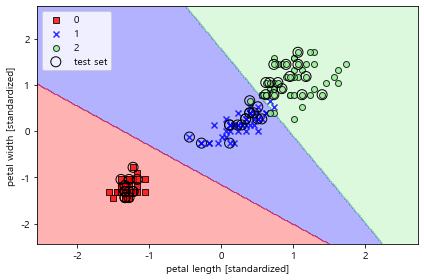

In [15]:
from sklearn.linear_model import LogisticRegression as LogitReg

model = LogitReg(C=100.0, random_state=1)
model.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
model.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [17]:
model.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

## 3.6.규제를 사용하여 과대적합 피하기

- 과대 적합 : 훈련 데이터로는 잘 동작하지만 새로운 데이터에 대해 일반화 되지 않는 현상
    - 분산이 크다고 함
    - 모델 파라미터가 너무 많아 주어진 데이터에서 너무 복잡한 모델을 만들기 때문
- 과소 적합 : 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않음을 의미
    - 편항이 크다고 함
    - 새로운 데이터에서도 성능이 낮을 가능성이 높음

```text
편향-분산 트레이드 오프

 일반적으로 '높은 분산'은 과대적합에 비례하고 '높은 편향'은 과소적합에 비례함.

 머신러닝 모델에서 분산은 모델을 여러 번 훈련했을 때 특정 샘플에 대한 예측의 일관성을 측정 예를 들어 훈련 데이터셋의 일부분을 사용하여 여러 번 훈련하는 경우를 뜻함. 이런 모델은 훈련 데이터의 무작위성에 민감하다고 말할 수 있음.

 반대로 편향은 다른 훈련 데이터셋에서 여러 번 훈련했을 때 예측이 정확한 값에서 얼마나 벗어났는지 측정. 편향은 무작위성이 아니라 구조적인 에러를 나타냄
```

- 좋은 편향-분산 트레이드오프를 찾는 한가지 방법은 규제를 사용하여 모델의 복잡도를 조정하는 것.
- **규제**는 공선성(특성 간의 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법
- 이는 과도한 파라미터 값을 제한하기 위해 추가적인 정보(편향)를 주입하는 개념
- 가장 널리 사용하는 규제의 형태는 **L2 규제** (L2 축소 또는 가중치 감쇠라고 부름)
$$
    \frac{\lambda}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2 = \frac{\lambda}{2}\sum_{j=1}^{m}w_{j}^2\\
    \lambda : 규제\,\,하이퍼파라미터
$$
- 로지스틱 회귀의 비용함수는 규제 항을 추가해서 규제를 적용
- 규제 항은 모델 훈련 과정에서 가중치를 줄이는 역할 수행
$$
    J(\mathbf{w}) = \sum_{i=1}^{n}\left[ -y^{(i)}\log(\phi(z^{(i)}))-(1-y^{(i)})\log(1-\phi(z^{(i)}))\right] + \frac{\lambda}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2
$$
- 규제 하이퍼파라미터 $\lambda$를 사용하여 가중치를 작게 유지하면서 훈련 데이터에 얼마나 잘 맞출지를 조정할 수 있음
- $\lambda$값을 증가하면 규제 강도가 높아짐

## 3.7.사이킷런 로지스틱 회귀에서의 규제

- 사이킷런의 `LogisticRegression` 클래스의 매개변수 `C`는 `SVM`에서 따온 파라미터
- 매개변수 `C`는 규제 하이퍼 파라미터 $\lambda$의 역수
- 결과적으로 역 규제 파라미터 `C`의 값을 감소시키면 규제 강도가 증가

In [18]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


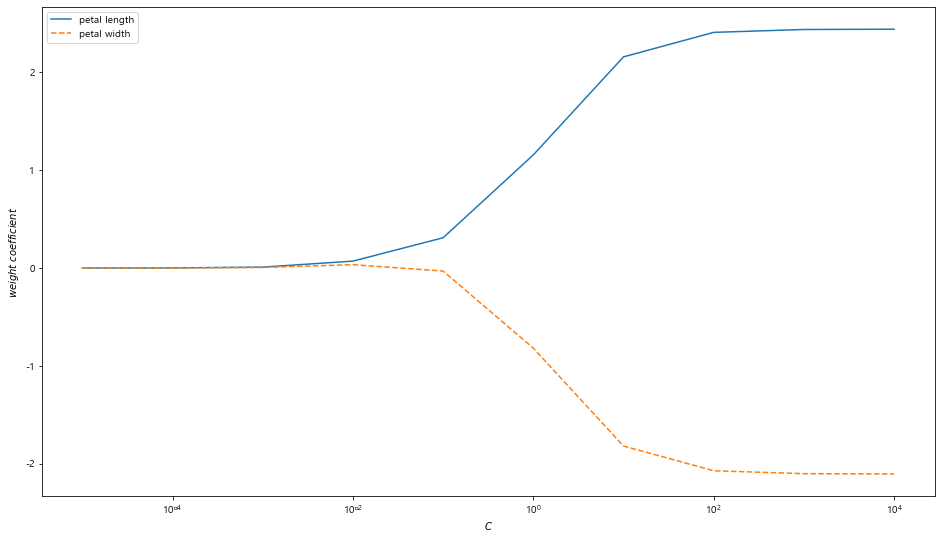

In [19]:
weights, params = [], []
for c in np.arange(-5, 5):
    LRG = LogitReg(C=10.**c, random_state=1, multi_class='ovr')
    LRG.fit(X_train_std, y_train)
    weights.append(LRG.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('$weight\,\,coefficient$')
plt.xlabel('$C$')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

# 4.SVM을 활용한 최대 마진 분류

- 서포트 벡터 머신 (Support Vector Machine)은 퍼셉트론의 확장
- 퍼센트론 알고리즘을 사용하여 분류 오차를 최소화
- SVM의 최적화 대상은 마진을 최대화 하는 것
- 마진은 클래스를 구분하는 초평면(결정경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의
- 이런 샘플을 서포트 벡터라고 함

## 4.1. 최대 마진

- 큰 마진의 결정 경계는 일반화 오차가 낮아지는 경향이 있음
- 작은 마진의 모델은 과대적합되기 쉬움
- 마진 최대화를 이해하기 위해 결정 경계와 나란히 놓인 양성 샘플 쪽의 초평면과 음성 샘플 쪽의 초평을 살펴봐야 함

## 4.2.슬랙 변수를 사용하여 비선형 분류 문제 다루기

- 슬랙 변수 $\zeta$를 활용한 SVM을 소프트 마진 분류라고 함
- 슬랙 변수는 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입
- 적절히 비용을 손해 보면서 분류 오차가 있는 상황에서 최적화 알고리즘이 수렴
- 양수 값인 슬랙 변수를 선형 제약 조건에 더하면 됨
$$\begin{align*}
    w_0+\mathbf{w}^T\mathbf{x}^{(i)} &\geq 1-\zeta^{(i)}\,\,\, y^{(i)}=1\,일\,때 \\
    w_0+\mathbf{w}^T\mathbf{x}^{(i)} &\leq 1+\zeta^{(i)}\,\,\, y^{(i)}=-1\,일\,때 \\
    i &= 1 \cdots N \,\, 까지
\end{align*}$$
- 최소화할 새로운 목적 함수는 다음과 같음
$$
\frac{1}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2+C\left( \sum_{i}\zeta^{(i)} \right)
$$
- 변수 `C`를 통해 분류 오차에 대한 비용을 조정할 수 있음
- `C` 값이 크면 오차에 대한 비용이 커짐
- `C` 값이 작으면 분류 오차에 덜 엄격해 짐
- 즉, `C`를 통해 마진 폭을 제어

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


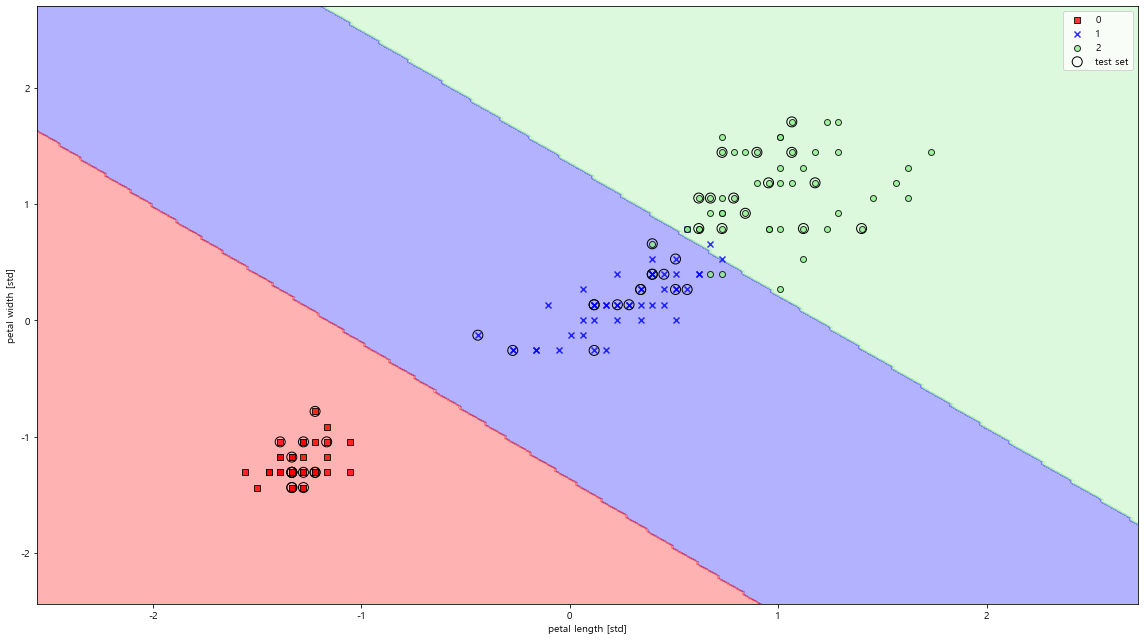

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, range(105, 150))

plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

```text
로지스틱 회귀 vs 서포트 벡터 머신

- 실제 분류 작업에서 선형 로지스틱 회귀와 선형 SVM은 종종 비슷한 결과를 만듦
- 로지스틱 회귀 : 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM보다 이상치에 민감
- SVM : 결정 경계에 가장 가까운 포인트(서포트 벡터)에 대부분의 관심을 둠
- 로지스틱 회귀는 비교적 모델이 간단하고 구현하기 쉬운 장점으로 인해, 업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합함

```

## 4.3.사이킷런의 다른 구현

- 사이킷런의 `LogisticRegression` 클래스는 `LIBLINEAR` 라이브러리를 사용 (최적화가 매우 잘된 C/C++ 라이브러리)
- SVM을 훈련하는 `SVC`클래스는 `LIBSVM` 라이브러리를 사용 (SVM에 특화된 C/C++ 라이브러리)
    - 사이킷런에서 선형 SVM 모델 분류를 위한 `LinearSVC`와 회귀를 위한 `LinearSVR` 클래스를 제공
    - 이 클래스들은 모두 `LIBLINEAR` 라이브러리를 사용
    - 선형 SVM에 대해서는 linear 커널을 사용하는 `SVC`, `SVR`보다 빠름
- 사이킷런은 `SGDClassifier` 클래스를 제공함
- 이 클래스는 `partial_fit()` 메서드를 사용하여 온라인 학습을 지원함
- 이 클래스는 아달린을 위해 구현한 SGD와 비슷함
- 기본 매개 변수를 사용한 퍼셉트론, 로짓회귀, 서포트 벡터 머신의 확률적 경사 하강법 버전은 다음의 코드와 같음

In [21]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log_loss')
svm = SGDClassifier(loss='svm')

# 5.커널 SVM을 사용하여 비선형 문제 해결

- svm의 진가는 비선형 분류 문제에서 커널을 사용하는 것
- 가장 널리 사용되는 커널 SVM을 알아볼 것

## 5.1.선형적으로 구분되지 않는 데이터를 위한 커널 방법

- 넘파이의 `logical_xor()`함수를 사용하여 XOR 형태의 데이터셋을 사용
- 대략 100개의 샘플은 클래스 레이블 1로 할당, 나머지 100개의 샘플은 클래스 레이블 -1로 할당

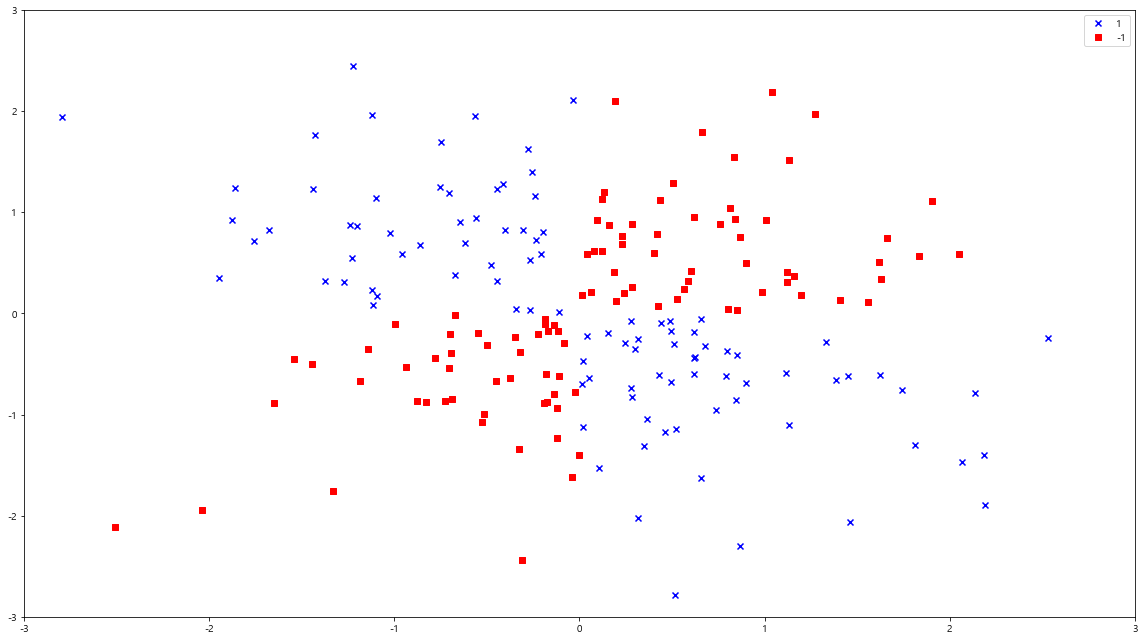

In [22]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label=1)
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label=-1)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 양성 클래스와 음성 클래스를 선형 초평면으로 구분하긴 어려움
- 선형적으로 분류되지 않는 데이터를 다루기 위해 커널 방법 사용
- 기본 아이디어는 매핑함수 $\phi$를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영
- 2차원 데이터셋을 투영을 통해 새로운 3차원 특성 공간으로 변환하여 클래스 구분
$$
\phi(x_1, x_2)=(z_1,z_2,z_3)=(x_1,x_2,x_{1}^{2}+x_{2}^{2})
$$
- 고차원 공간에서 두 클래스를 구분하는 선형 초평면은 원본 특성 공간으로 되돌리면 비선형 결정 경계가 됨

## 5.2. 커널 기법을 사용하여 고차원 공간에서 분할 초평면

- SVM으로 비선형 문제를 풀기 위해 매핑함수 $\phi$를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환
- 새로운 특성 공간에서 데이터를 분류하는 선형 SVM 모델을 훈련
- 동일한 매핑 함수 $\phi$를 사용하여 새로운 본 적 없는 데이터를 변환하고 선형 SVM 모델을 사용하여 분류할 수 있음
- 그러나 새로운 특성을 만드는 계산 비용이 너무 비쌈 (고차원의 경우 더더욱)
- 커널 기법을 통해 이를 극복 (쿼드라틱 프로그래밍 문제를 푸는 방법은 다루지 않음)
- 이 과정에서 필요한 것은 점곱 $\mathbf{x}^{(i)T}\mathbf{x}^{(j)}$를 $\phi(\mathbf{x}^{(i)})^T\phi(\mathbf{x}^{(j)})$ 로 바꾸는 것
- 두 포인트 사이 점곱을 계산하는 데 드는 높은 비용을 절감하기 위해 **커널 함수**를 정의
$$\begin{align*}
    \kappa\left( \mathbf{x}^{(i)}, \mathbf{x}^{(j)}\right) = \phi(\mathbf{x}^{(i)})^T\phi(\mathbf{x}^{(j)})
\end{align*}$$
- 가장 널리 사용되는 커널은 방사 기저 함수(Radial Basis Function, RBF) (또는 가우시안 커널이라고도 함)
$$
\begin{align*}
    \kappa\left( \mathbf{x}^{(i)}, \mathbf{x}^{(j)}\right) = \exp\left( -\frac{\begin{Vmatrix} \mathbf{x}^{(i)}-\mathbf{x}^{(j)} \end{Vmatrix}^2}{2\sigma^2} \right) &\\
    \kappa\left( \mathbf{x}^{(i)}, \mathbf{x}^{(j)}\right) = \exp\left( -\gamma\begin{Vmatrix} \mathbf{x}^{(i)}-\mathbf{x}^{(j)} \end{Vmatrix}^2 \right) &\\
    \gamma &= \frac{1}{2\sigma^2} 은\, 최적화\, 대상\, 파라미터가\, 아님
\end{align*}
$$
- 대략적으로 커널이란 샘플간 유사도 함수로 해석할 수 이음
- 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 함
- 지수 함수로 얻게 되는 유사도 점수 1(매우 비슷한 샘플)과 0(매우 다른 샘플) 사이 범위를 가짐

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


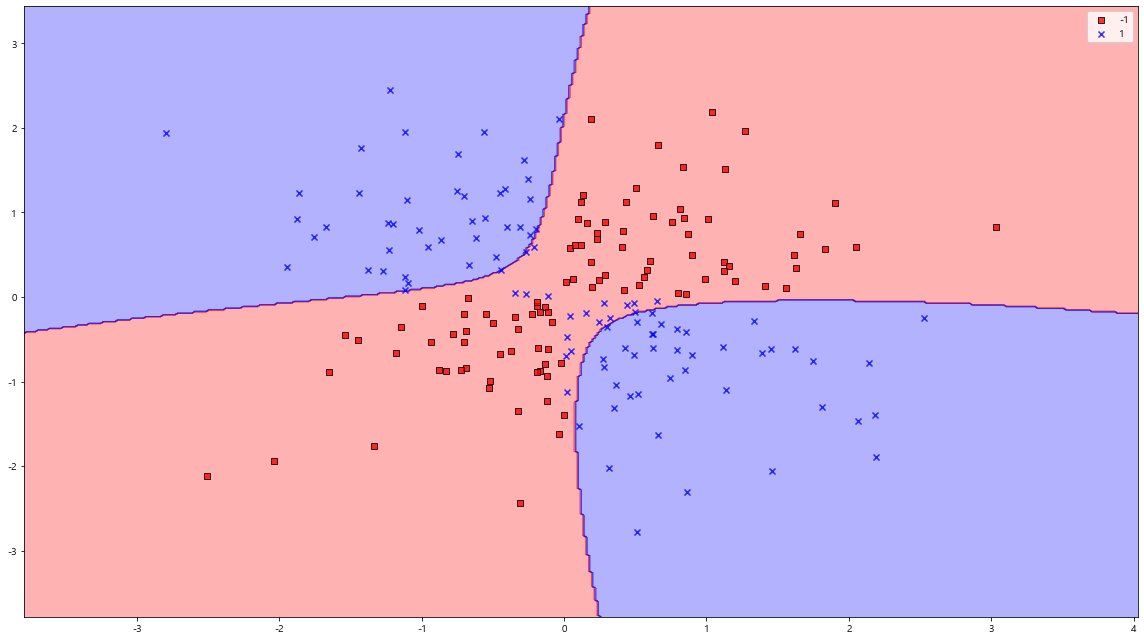

In [23]:
svm = SVC(kernel='rbf', random_state=1, gamma=.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- `gamma=.1`로 지정한 매개변수 $\gamma$를 가우시안 구의 크기를 제한하는 매개변수로 이해할 수 있음
- $\gamma$값을 크게 하면 서포트 벡터의 영향이나 범위가 줄어 듦
- 결정 경계는 더욱 샘플에 가까워지고 구불구불해짐

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


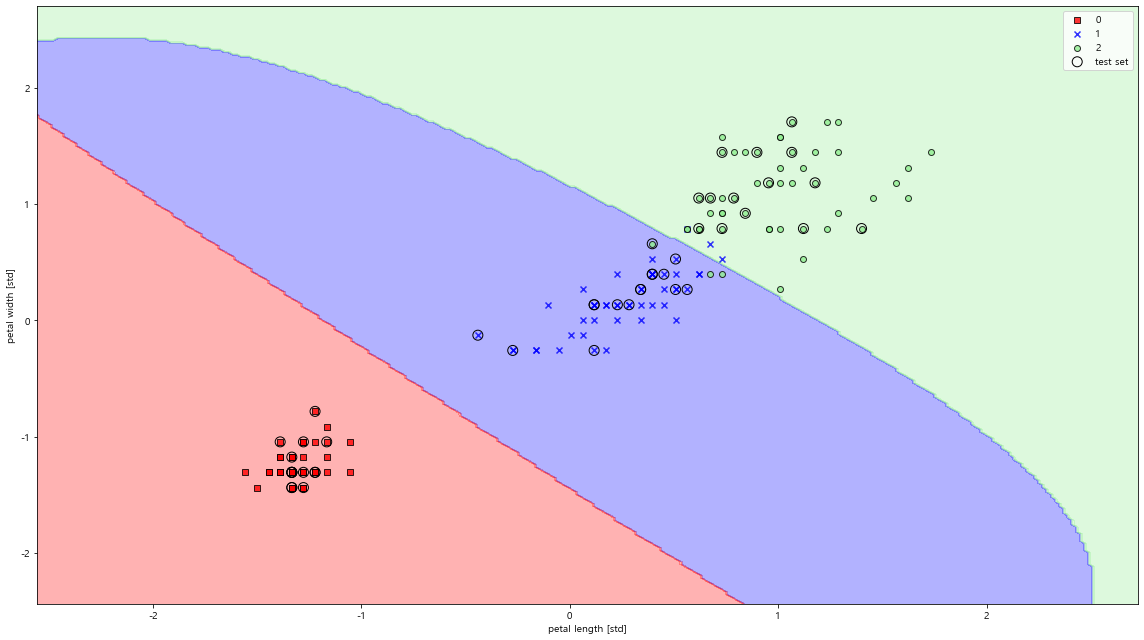

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, range(105, 150))

plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


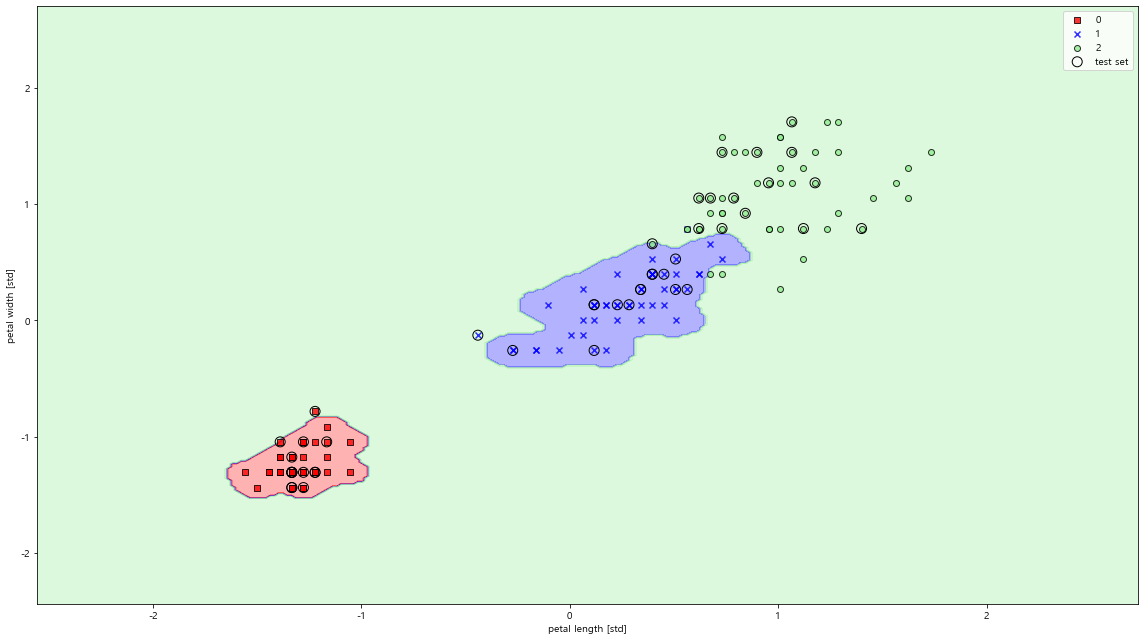

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, range(105, 150))

plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 훈련데이터에서는 잘 맞지만 일반화 오차가 높을 확률이 있음
- 알고리즘이 훈련 데이터셋 변화에 너무 민감할 때 $\gamma$ 매개변수가 과대적합 또는 분산을 조절하는 중요한 역할도 함

# 6.결정 트리 학습

- 결정트리는 분류기 설명에 유용한 모델
- 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델
- 트리의 루트에서 시작해서 정보 이득이 최대가 되는 특성으로 데이터를 나눔
- 반복 과정을 통해 리프 노드가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복
- 각 노드의 모든 훈련 샘플은 동일한 클래스에 속함
- 노드가 많은 깊은 트리가 만들어지고 과대적합의 가능성이 높음
- 이를 방지하기 위해 트리의 최대 깊이를 제한하는 Pruning을 수행

## 6.1.정보 이득 최대화: 자원을 최대로 활용

- 가장 정보가 풍부한 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의함
- 이 목적 함수는 각 분할에서 정보 이득을 최대화 함
- 정보 이득은 다음과 같이 정의됨
$$\begin{align*}
IG(D_p,f)=I(D_p)-\sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)
\end{align*}$$
- 여기서 $f$는 분할에 사용할 특성
- $D_p$와 $D_j$는 부모와 $j$번째 자식 노드의 데이터 셋
- $I$는 불순도 지표
- $N_p$는 부모 노드에 있는 전체 샘플 개수
- $N_j$는 $j$번 째 자식 노드에 있는 샘플 개수
- 정보 이득은 단순히 부모 노드의 불순도와 자신노드의 불순도 합의 차이
- 자식 노드의 불순도가 낮을수록 정보 이득이 커짐
- 간단한 구현과 탐색 공간 확보를 위해 대부분 이진 결정 트리를 사용(부모노드는 두 개의 자식 노드 $D_{left}$와 $D_{right}$로 나뉨)
$$\begin{align*}
IG(D_p,f)=I(D_p)-\sum_{j=1}^{m}\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})
\end{align*}$$
- 이진 결정 트리에 사용되는 세 개의 불순도 지표(또는 분할 조건)
    - 지니 불순도 (Gini impurity, $I_G$)
    - 엔트로피 (entropy, $I_H$)
    - 분류 오차 (classification error, $I_E$)
1. 엔트로피
    - 샘플이 있는 모든 클래스 ($p(i|t)\neq 0$)에 대한 엔트로피의 정의는 다음과 같음
    $$\begin{align*}
    I_H(t)=-\sum_{i=1}^{c}p(i|t)\log_2p(i|t)
    \end{align*}$$
    - 여기서 $p(i|t)$는 특정 노드 $t$에서 클래스 $i$에 속한 샘플 비율
    - 한 노드의 모든 샘플이 같은 클래스이면 엔트로피는 0이 됨
    - 클래스 분포가 균등하면 엔트로피는 최대
    - 엔트로피 조건을 트리의 상호 의존 정보를 최대화하는 것으로 이해할 수 있음<br><br>
2. 지니 불순도
    - 지니불순도는 잘못 분류될 확률을 최소화하기 위한 기준으로 이해할 수 있음
    $$\begin{align*}
    I_G(t)=-\sum_{i=1}^{c}p(i|t)(1-p(i|t))=1-\sum_{i=1}^{c}p(i|t)^2
    \end{align*}$$
    - 엔트로피와 비슷하게 지니 불순도는 클래스가 완벽하게 섞여 있을 때가 최대가 됨
    - 지니 불순도와 엔트로피는 매우 비슷한 결과가 나옴
    - 보통 불순도 조건을 바꾸어 트리를 평가하는 거소다 가지치기 수준을 바꾸면서 튜닝하는 것이 나음<br><br>
3. 분류 오차
    $$
    I_E=1-max\left\{ p(i|t) \right\}
    $$
    - 가지치기에는 좋은 기준이지만 결정 트리 구성에 권장되지는 않음
    - 노드의 클래스 확률 변화에 덜 민감하기 때문

In [26]:
plt.rcParams["font.size"] = 20

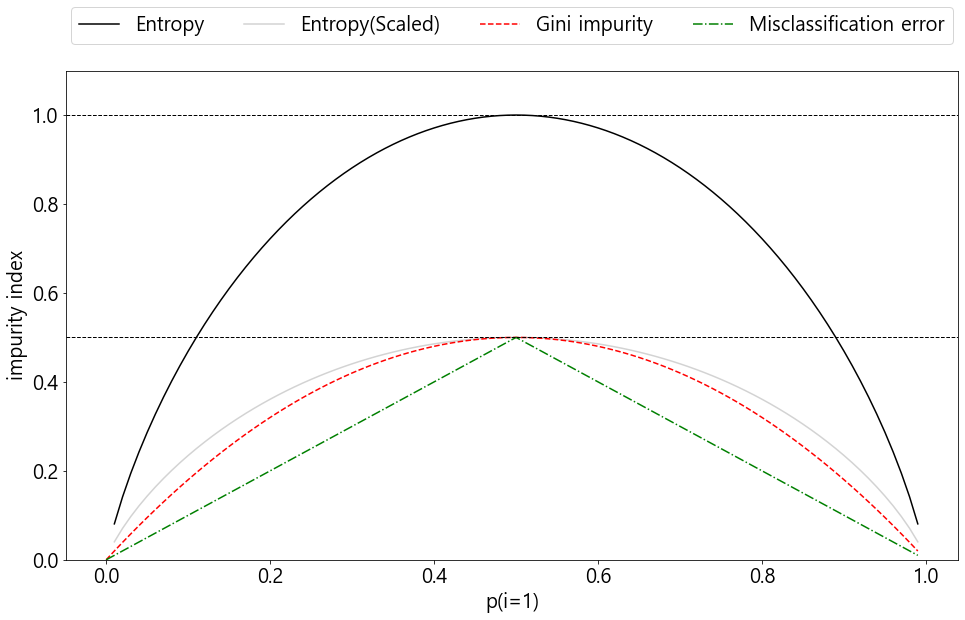

In [27]:
from matplotlib import pyplot as plt
import numpy as np

def gini(p):
    return p*(1-p)+(1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

def error(p):
    return 1-np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy(Scaled)', 'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

## 6.2.결정 트리 만들기 

- 특성 공간을 사각 격자로 나누기에 복잡한 결정 경계를 만들 수 있음
- 결정 트리가 깊어질수록 결정 경계가 복잡해지고 과대적합되기 쉬움
- 지니 불순도 조건으로 최대 깊이가 4인 결정트리 훈련
- 결정트리는 스케일 조정이 필요 없지만, 그래프 표현을 위해 조정할 수도 있음

```text
* DecisionTreeClassifier 매개변수

- criterion : default-gini, 그외 엔트로피 불순도를 나타내는 entropy로 지정가능
- max_depth : default-None, 모든 리프노드가 순수해질 떄까지 트리 성장
- max_faetures : default-None, 전체특성 사용 (특성의 개수나 특성의 비율 지정 가능 auto/sqrt: 특성개수의 제곱근 사용, log2: 특성 개수의 이진로그 값)
```

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


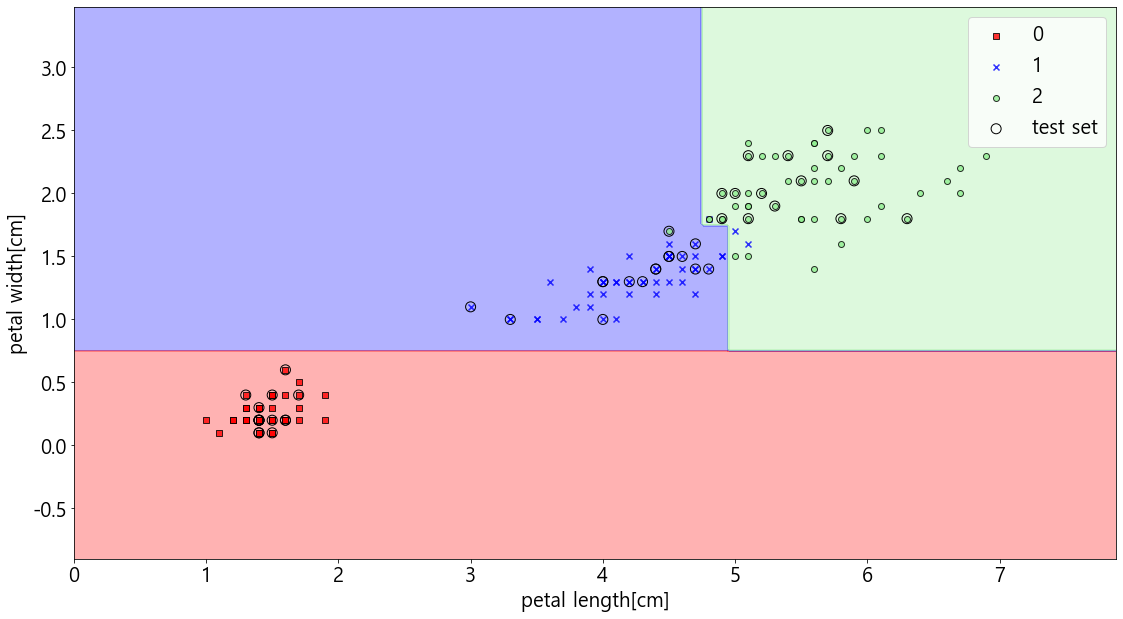

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC

tree_model = DTC(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, tree_model, range(105, 150))

plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

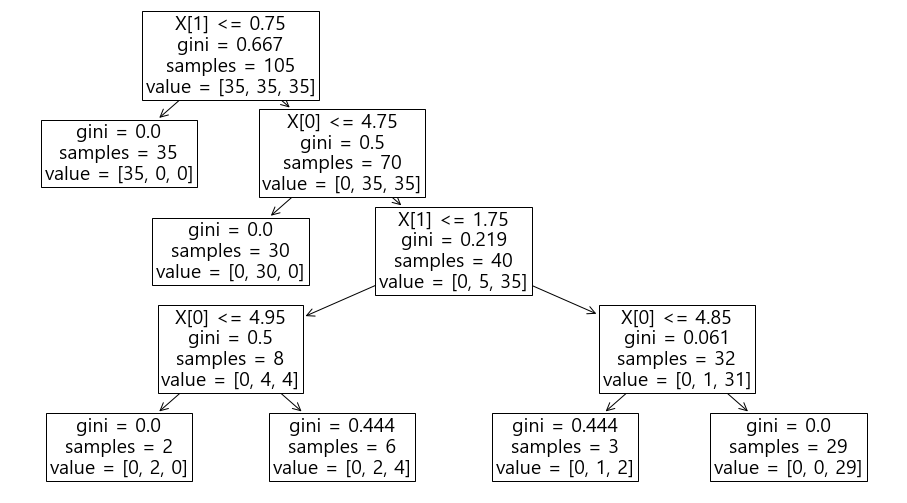

In [29]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [30]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal_width'],
                           out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

```text
* 사이킷런의 결정트리에서 지원하는 대표적인 사전 가지치기 설정
```

|파라미터 명|설명|Default|
|------------------------|-----------------------------------------------------|------------:|
|`max_leaf_nodes`        |리프 노드의 최대 개수를 지정                           |None(제한없음)|
|`min_samples_leaf`      |리프 노드가 되기 위한 최소 샘플 개수나 샘플의 비율을 지정|1            |
|`min_samples_split`     |노드 분할을 위한 최소 샘플 개수나 샘플의 비율 지정      |2             |
|`min_impurity_decrease` |노드 분할이 감소시킬 최소 불순도를 지정                 |0            |
|`min_impurity_split`    |트리 서장을 멈출 불순도 임계값 (0.25버전에서는 삭제 예정)|0            |


## 6.3.랜덤 포레스트로 여러 결정트리 연결

- 앙상블은 뛰어난 분류 성능과 과대적합에 안정적
- 랜덤 포레스트 : 결정트리의 앙상블
- 여러 개의 결정 트리를 평균 내는 것
- 개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합 위험을 낮춤

> **랜덤 포레스트의 단계**
>> 1. n개의 랜덤한 부트스트랩 샘플을 뽑음 (훈련 데이터셋에서 중복을 허용하면서 랜덤하게 n개의 샘플 선택)
>> 2. 부트스트랩 샘플에서 결정트리를 학습. 각노드는 다음을 따름 <br> <span style="color:magenta">(각 노드에서 최선의 분할을 찾기 위해 모든 특성을 평가하는 것이 아니라 랜덤하게 선택된 일부 특성만을 활용)</span> <br>
>>  a. 중복을 허용하지 않고 랜덤하게 d개의 특성 선택<br>
>>  b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할
>> 3. 1~2를 k번 반복
>> 4. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당

- 해석이 쉽지는 않지만 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 된다는 장점
- 일반적으로 랜덤 포레스트는 가지치기할 필요가 없음
- 앙상블 모델이 개별 결정 트리가 만드는 잡음으로부터 매우 안정되어 있기 때문
- 실전에서 신경 써야 할 파라미터는 <span style="color:lightgreen">랜덤 포레스트가 만들 트리 개수</span>
- 트리 개수가 많을수록 계산 비용이 증가하는 만큼 랜덤 포레스트 분류기의 성능이 좋아짐
- 최적화할 만한 다른 하이퍼파라미터는 <span style="color:lightgreen">부트스트랩 샘플의 크기 n</span>과 <span style="color:lightgreen">각 분할에서 무작위로 선택할 특성 개수</span>
- 부트스트랩 샘플 크기는 편향-분산 트레이드 오프를 조절할 수 있음
    - 부트스트랩 샘플 크기가 작아지면 개별 트리의 다양성이 증가
    - 특정 훈련 샘플이 부트스트랩 샘플에 포함될 확률이 낮기 때문
    - 결국 <span style="color:gold">부트스트랩 샘플 크기가 감소</span>하면 랜덤 포레스트의 무작위성이 증가하고 과대적합 영향이 줄어듬
    - 일반적으로 부트스트랩 샘플이 작을수록 랜덤 포레스트의 전체적인 성능이 줄어듬
    - 훈련 성능과 테스트 성능 사이에 격차가 작아지지만 전체적인 테스트 성능이 감소하기 때문
    - 반대로 <span style="color:gold">부트스트랩 샘플 크기가 증가</span>하면 과대적합의 가능성이 늘어남
    - 부트스트랩 샘플과 개별 결정 트리가 서로 비슷해지기 때문에 원본 후련 데이터 셋에 가깝게 학습됨
- `RandomForestClassifier`는 부트스트랩 샘플 크기를 원본 훈련 데이터 셋의 샘플 개수와 동일하게 함
- 이는 균형 잡힌 편향-분산 트레이드오프를 얻을 수 있기 때문
    - `max_samples` 매개변수를 통해 원하는 부트스트랩 샘플 크기나 샘플 비율을 지정(기본값은 None으로 훈련 데이터셋의 크기와 동일한 부트스트랩 샘플을 만듦)
- 분할에 사용할 특성 개수 d는 훈련 데이터 셋에 있는 전체 특성 개수보다 작게 지정하는 편
- 사이킷런과 다른 라이브러리에서사용하는 적당한 기본 값은 $d=\sqrt{m}$ ($m$은 훈련 데이터 셋에 있는 특성 개수)
    - `max_features` 매개변수의 기본값이 'auto'로 특성 개수의 제곱근 (1.3버전에서 기본값이 'sqrt'로 바뀜)
    - `RandomForestRegression` 클래스의 `max_featrues` 기본값은 훈련 데이터셋의 특성 개수와 동일

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


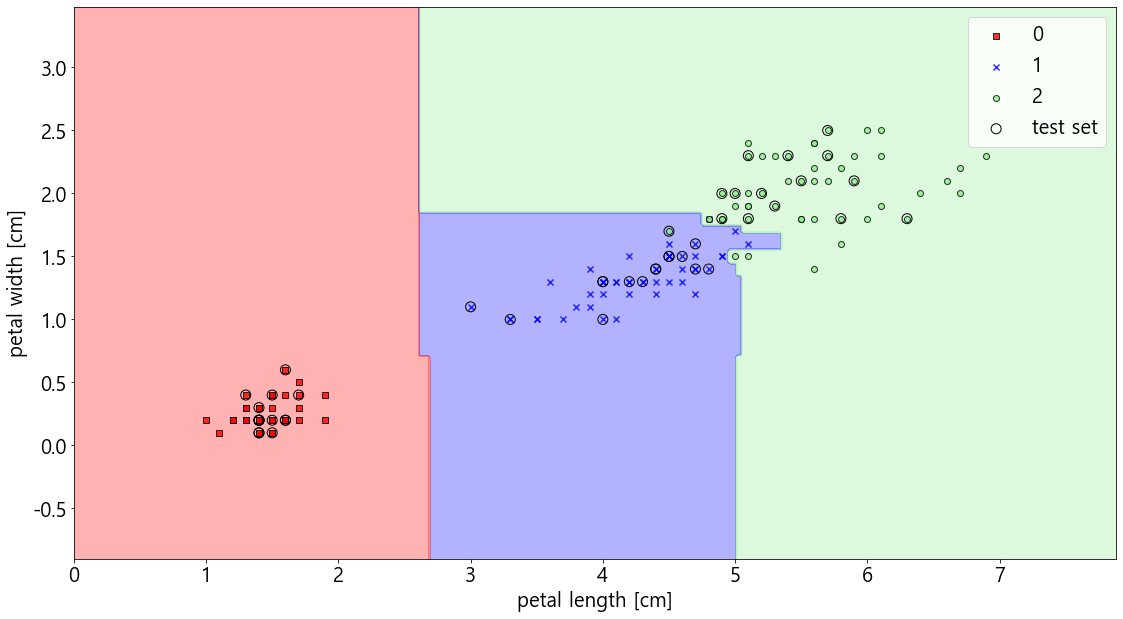

In [32]:
from sklearn.ensemble import RandomForestClassifier as RFC

forest = RFC(criterion='gini', n_estimators=25, random_state=1, n_jobs=8)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, forest, range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- `n_estimators` : 매개변수 25개의 결정트리 사용
- `criterion` : 지니 불순도 사용
- `n_jobs` : 컴퓨터의 멀티 코어를 사용해서 모델 훈련을 병렬화

# 7.k-최근접 이웃: 게으른 학습 알고리즘

- 판별 함수를 학습하는 대신 훈련 데이터셋을 메모리에 저장하기에 게으른 학습기라고 불림
```text
* 모수모델 vs 비모수 모델

# 모수모델
    - 새로운 데이터 포인트를 분류할 수 있는 함수를 학습하기 위해 훈련 데이터셋에서 모델 파라미터를 추정
    - 훈련이 끝나면 원본 훈련 데이터셋이 더 이상 필요하지 않음
    - 퍼셉트론, 로지스틱 회귀, 선형 SVM

# 비모수 모델
    - 고정된 개수의 파라미터로 설명될 수 없음
    - 훈련 데이터가 늘어남에 따라 파라미터 개수도 늘어남
    - 결정트리, 랜덤포레스트, 커널 SVM, KNN

KNN은 인스턴스 기반 모델이라고 함
인스턴스 기반 모델은 훈련 데이터셋을 메모리에 저장하는 특징이 있음
게으른 학습은 인스턴스 기반 학습의 특별한 경우이며 학습 과정에 비용이 들지 않음

```
- KNN의 단계
    - 숫자 k와 거리 측정 기준을 선택
    - 분류하려는 샘플에서 k개의 최근접 이웃을 찾음
    - 다수결 투표를 통해 클래스 레이블 할당

- 이러한 메모리 기반 방식의 분류기는 수집된 새로운 훈련 데이터에 즉시 적응할 수 있는 것이 주요 장점
- 새로운 샘플을 분류하는 계산 복잡도는 단점
- 데이터셋의 차원이 적고 알고리즘이 k-d 트리 같은 효율적인 데이터 구조로 구현되어 있지 않다면 최악의 경우 훈련 데이터 셋의 샘플 개수에 선형적으로 증가
- 또 훈련 단계가 ㄱ없기 때문에 훈련 샘플을 버릴 수 없음
- 대규모 데이터셋에서는 저장 공간의 문제 발생

C:\Users\yunjc\AppData\Local\Temp\ipykernel_31696\79769711.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


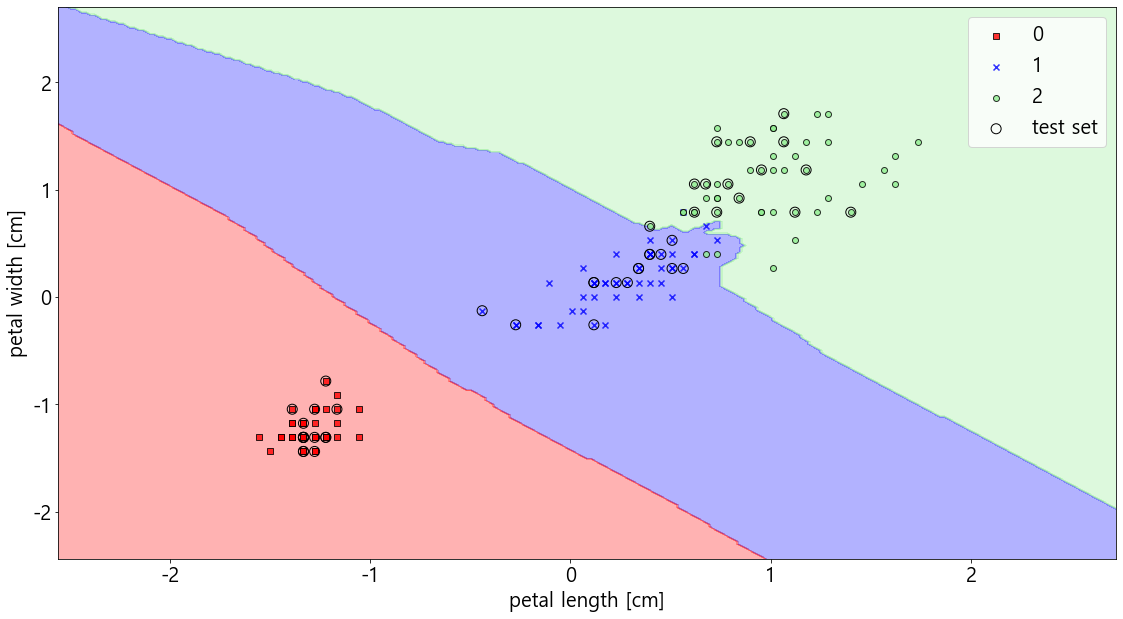

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=5, p=2, metric="minkowski")
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, knn, range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 적절한 k를 선택하는 것은 과대적합/과소적합 사이에서 올바른 균형을 잡기 위해 중요
- 데이터셋의 특성에 알맞은 거리 측정 지표를 선택
- 실수 특성을 살리기 위해 유클리디안 거리를 주로 사용
- 각 특성이 동일하게 취급되기 위해 표준화하는 것이 중요
- minkowski 거리는 유클리디안 거리와 맨해튼 거리를 일반화 한것
$$ \begin{align*}
d(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) = \sqrt[p]{\sum_k\begin{vmatrix}\mathbf{x}^{(i)}_k-\mathbf{x}^{(j)}_k\end{vmatrix}^p} & \\
& if\,\,p=2,\,\,유클리디안\,거리 \\
& if\,\,p=1,\,\,맨해튼\,거리

\end{align*} $$